In [ ]:
import zipfile
from google.colab import drive
from google.colab import files
import os

# Paths to zip files
train_zip = '/content/drive/MyDrive/train.zip'
test_zip = '/content/drive/MyDrive/test.zip'
val_zip = '/content/drive/MyDrive/validation.zip'

# Unzipping datasets
# Changed the extraction path to a directory
with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/train') # Extracting to a directory named 'train'

with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/test') # Extracting to a directory named 'test'

with zipfile.ZipFile(val_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/validation') # Extracting to a directory named 'validation'

# Updated paths to extracted directories
train_path = '/content/drive/MyDrive/train' # Path to the extracted 'train' directory
test_path = '/content/drive/MyDrive/test' # Path to the extracted 'test' directory
validation_path = '/content/drive/MyDrive/validation' # Path to the extracted 'validation' directory

In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Set paths
train_path = "/content/drive/MyDrive/train"
test_path = "/content/drive/MyDrive/test"
validation_path = "/content/drive/MyDrive/validation"

# Data preprocessing with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for consistent evaluation
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [ ]:
# Load VGG16 model (pre-trained on ImageNet) and fine-tune
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base model layers

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 380s 7s/step - accuracy: 0.0407 - loss: 3.9049 - val_accuracy: 0.1880 - val_loss: 3.1986
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 341s 7s/step - accuracy: 0.0981 - loss: 3.4060 - val_accuracy: 0.2821 - val_loss: 2.8912
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.1351 - loss: 3.2498 - val_accuracy: 0.3818 - val_loss: 2.6414
Epoch 4/25
45/50 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.1906 - loss: 3.0502

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.1920 - loss: 3.0434 - val_accuracy: 0.3960 - val_loss: 2.4306
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 311s 6s/step - accuracy: 0.2260 - loss: 2.8813 - val_accuracy: 0.4387 - val_loss: 2.2120
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.2528 - loss: 2.7954 - val_accuracy: 0.5128 - val_loss: 2.0557
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 280s 6s/step - accuracy: 0.2757 - loss: 2.6299 - val_accuracy: 0.5926 - val_loss: 1.8522
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 314s 6s/step - accuracy: 0.3145 - loss: 2.5146 - val_accuracy: 0.5926 - val_loss: 1.7758
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 332s 6s/step - accuracy: 0.3280 - loss: 2.4751 - val_accuracy: 0.6097 - val_loss: 1.6890
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 0.3494 - loss: 2.4035 - val_accuracy: 0.6182 - val_loss: 1.5926
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 336s 7s/step - accuracy: 0.3472 - loss: 2.3500 - val_accuracy: 0.6439 - val_loss: 

In [ ]:
# Fine tune the model]
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Classification report and confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))



Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 974s 5s/step - accuracy: 0.5122 - loss: 1.6997 - val_accuracy: 0.8205 - val_loss: 0.6723
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1026s 5s/step - accuracy: 0.5760 - loss: 1.4511 - val_accuracy: 0.8291 - val_loss: 0.5903
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 989s 5s/step - accuracy: 0.5975 - loss: 1.4119 - val_accuracy: 0.8405 - val_loss: 0.5428
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1025s 5s/step - accuracy: 0.6072 - loss: 1.3176 - val_accuracy: 0.8575 - val_loss: 0.4741
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 951s 5s/step - accuracy: 0.6412 - loss: 1.2230 - val_accuracy: 0.8547 - val_loss: 0.4587
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 942s 5s/step - accuracy: 0.6281 - loss: 1.2428 - val_accuracy: 0.8860 - val_loss: 0.4067
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 981s 5s/step - accuracy: 0.6480 - loss: 1.1388 - val_accuracy: 0.8946 - val_loss: 0.3862
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 942s 5s/step - accuracy: 0.6950 - loss: 1.0228 - val_ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


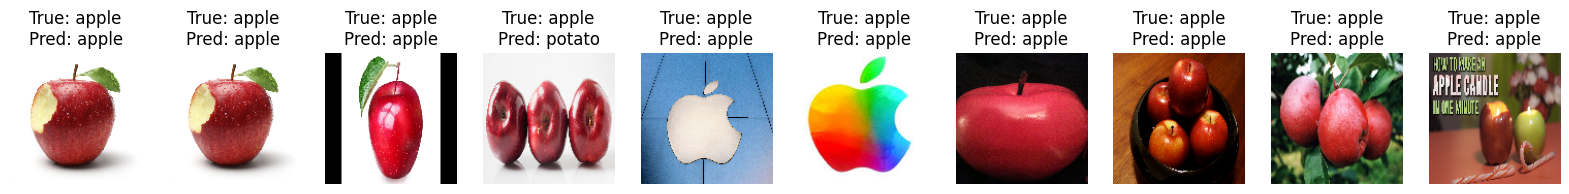

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix with annotations
cm_fig = px.imshow(cm,
                   labels=dict(x="Predicted", y="True", color="Count"),
                   x=list(test_generator.class_indices.keys()),
                   y=list(test_generator.class_indices.keys()),
                   text_auto=True)
cm_fig.update_layout(title="Confusion Matrix")
cm_fig.show()

# Plot training and validation accuracy/loss
def plot_training_history(history, title_suffix=""):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines', name='Train Accuracy'))
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
    fig.update_layout(title=f'Model Accuracy {title_suffix}', xaxis=dict(title='Epoch'), yaxis=dict(title='Accuracy'))
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Train Loss'))
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
    fig.update_layout(title=f'Model Loss {title_suffix}', xaxis=dict(title='Epoch'), yaxis=dict(title='Loss'))
    fig.show()

plot_training_history(history, " - Initial Training")
plot_training_history(history_fine, " - Fine-tuning")

# Display predictions
def display_predictions(generator, model, num_images=10):
    generator.reset()
    images, labels = next(generator)
    predictions = model.predict(images)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        true_label = list(generator.class_indices.keys())[np.argmax(labels[i])]
        pred_label = list(generator.class_indices.keys())[np.argmax(predictions[i])]
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off')
    plt.show()

display_predictions(test_generator, model)


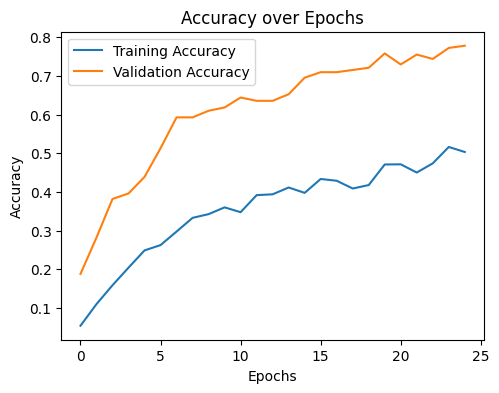

In [ ]:
#model save
model.save('fruit_vege_model.keras')

#training history
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

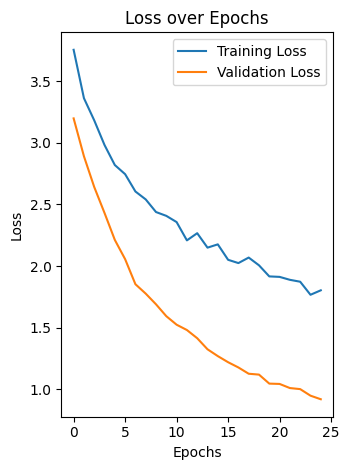

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


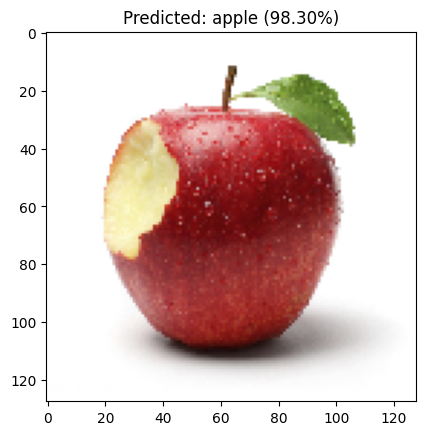

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


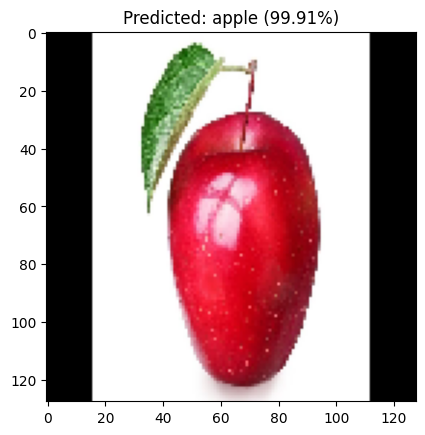

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


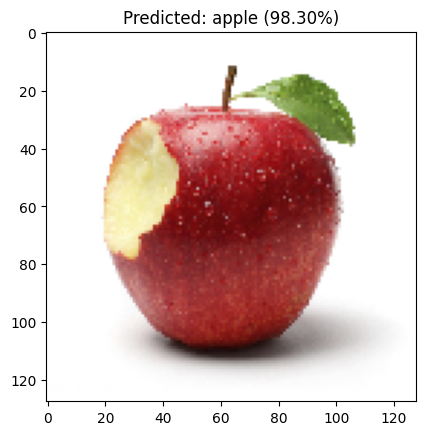

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


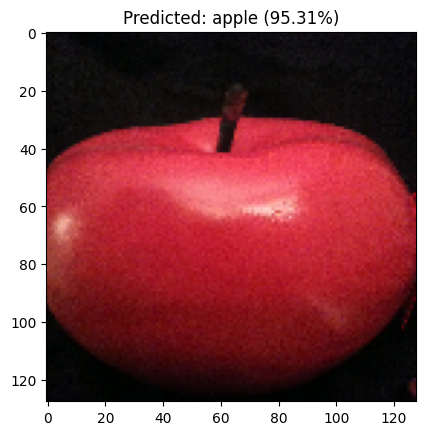

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


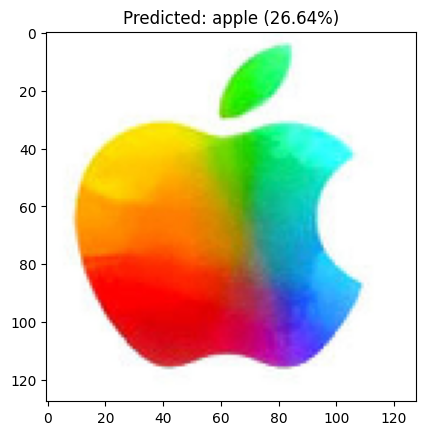

In [ ]:
from keras.preprocessing.image import load_img, img_to_array  # Import load_img and img_to_array

#predict image
def predict_sample(image_path, model, class_indices):
    try:
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_indices[predicted_class_index]
        predicted_prob = prediction[0][predicted_class_index] * 100

        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class} ({predicted_prob:.2f}%)')
        plt.show()
    except Exception as e:
        print(f"Error loading or predicting image {image_path}: {e}")

#images validation set
class_indices = validation_generator.class_indices
class_indices = dict((v, k) for k, v in class_indices.items())

validation_dir = validation_generator.directory

validation_images_dir = os.path.join(validation_dir, os.listdir(validation_dir)[0])
sample_images = os.listdir(validation_images_dir)[:5]

for img_name in sample_images:
    img_path = os.path.join(validation_images_dir, img_name)
    predict_sample(img_path, model, class_indices)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install matplotlib

In [ ]:
!pip install numpy